In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# Set plot style
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/udemy-course-recommendation/UdemyCleanedTitle.csv")

In [3]:
df.head()

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url is_paid price  \
0  https://www.udemy.com/ultimate-investment-bank...    True   200   
1      https://www.udemy.com/goods-and-services-tax/    True    75   
2  https://www.udemy.com/financial-modeling-for-b...    True    45   
3  https://www.udemy.com/complete-excel-finance-c...    True    95   
4  https://www.udemy.com/how-to-maximize-your-pro...    True   200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792          923           274          All Levels   
2             2174           74            51  Intermediate Level   
3             2451           11            36          All Levels   
4             1276           45            26  Intermediate Level   

  content_duration   published_timestamp           subject  \
0        1.5 hours  2017-01-18T20:58:58Z  Business Finance   
1         39 hours  2017-03-09T16:34:20Z  Business Finance   
2        2.5 hours  2016-12-19T19:26:30Z  Business Finance   
3          3 hours  2017-05-30T20:07:24Z  Business Finance   
4          2 hours  2016-12-13T14:57:18Z  Business Finance   

                                         Clean_title  
0                 Ultimate Investment Banking Course  
1  Complete GST Course  Certification  Grow Practice  
2   Financial Modeling Business Analysts Consultants  
3        Beginner Pro  Financial Analysis Excel 2017  
4                   Maximize Profits Trading Options

In [4]:
df.shape

(3683, 13)

In [5]:
df.isnull().sum()

course_id               0
course_title            0
url                     0
is_paid                 0
price                   0
num_subscribers         0
num_reviews             0
num_lectures            0
level                   0
content_duration        0
published_timestamp     0
subject                 0
Clean_title            20
dtype: int64

In [6]:
df['Clean_title'].fillna(df['Clean_title'].mode()[0], inplace=True)

/tmp/ipykernel_126/1874746334.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Clean_title'].fillna(df['Clean_title'].mode()[0], inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   object
 4   price                3683 non-null   object
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
 12  Clean_title          3683 non-null   object
dtypes: int64(4), object(9)
memory usage: 374.2+ KB


In [8]:
# Clean course titles
df['Clean_title'] = df['course_title'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Convert content_duration to numeric
df['content_duration'] = df['content_duration'].str.extract(r'(\d+\.?\d*)').astype(float)

# Convert published_timestamp to datetime, handling invalid entries
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'], errors='coerce')

# Add year column for valid timestamps
df['year'] = df['published_timestamp'].dt.year


In [9]:
# Check for invalid timestamps
invalid_timestamps = df[df['published_timestamp'].isna()]
print(f"Number of invalid timestamps: {len(invalid_timestamps)}")
if not invalid_timestamps.empty:
    print("Sample of invalid timestamp entries:")
    print(invalid_timestamps[['course_title', 'published_timestamp']].head())

Number of invalid timestamps: 1
Sample of invalid timestamp entries:
                                           course_title published_timestamp
2066  Learn Classical Guitar Technique and play 'Spa...                 NaT


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

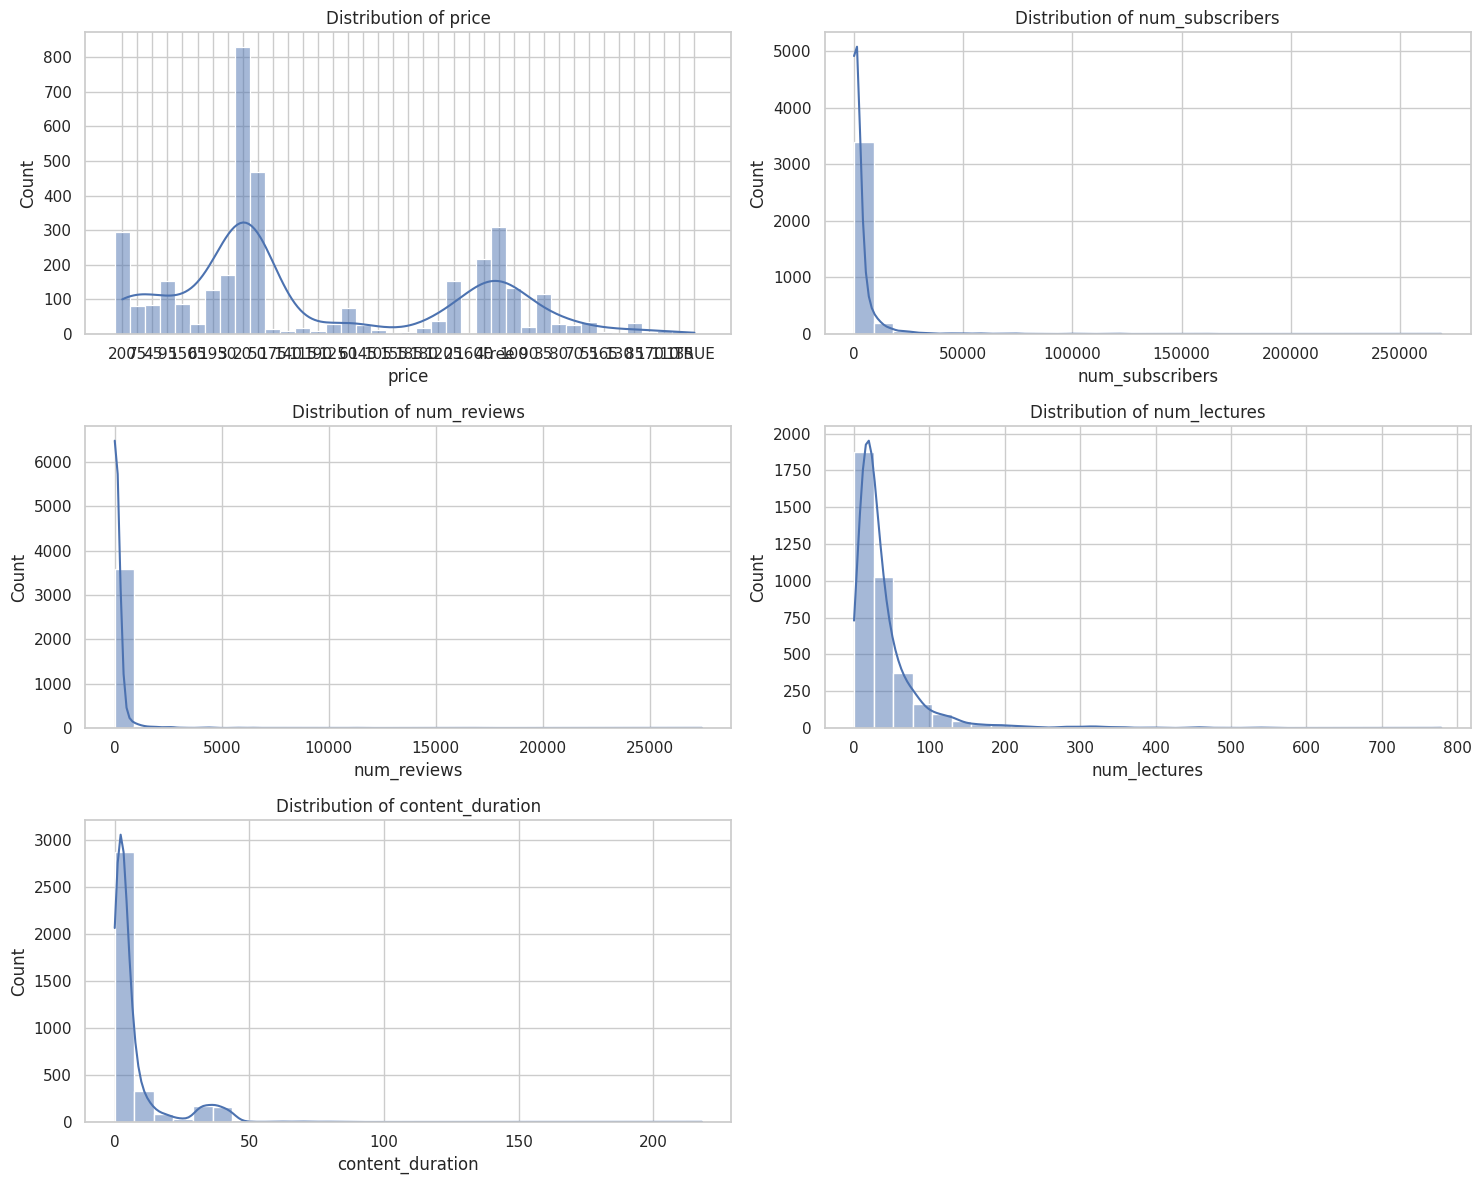

In [10]:
# Visualization 1: Distribution of Numerical Features
numerical_cols = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
axes[-1].axis('off')
plt.tight_layout()
plt.show()

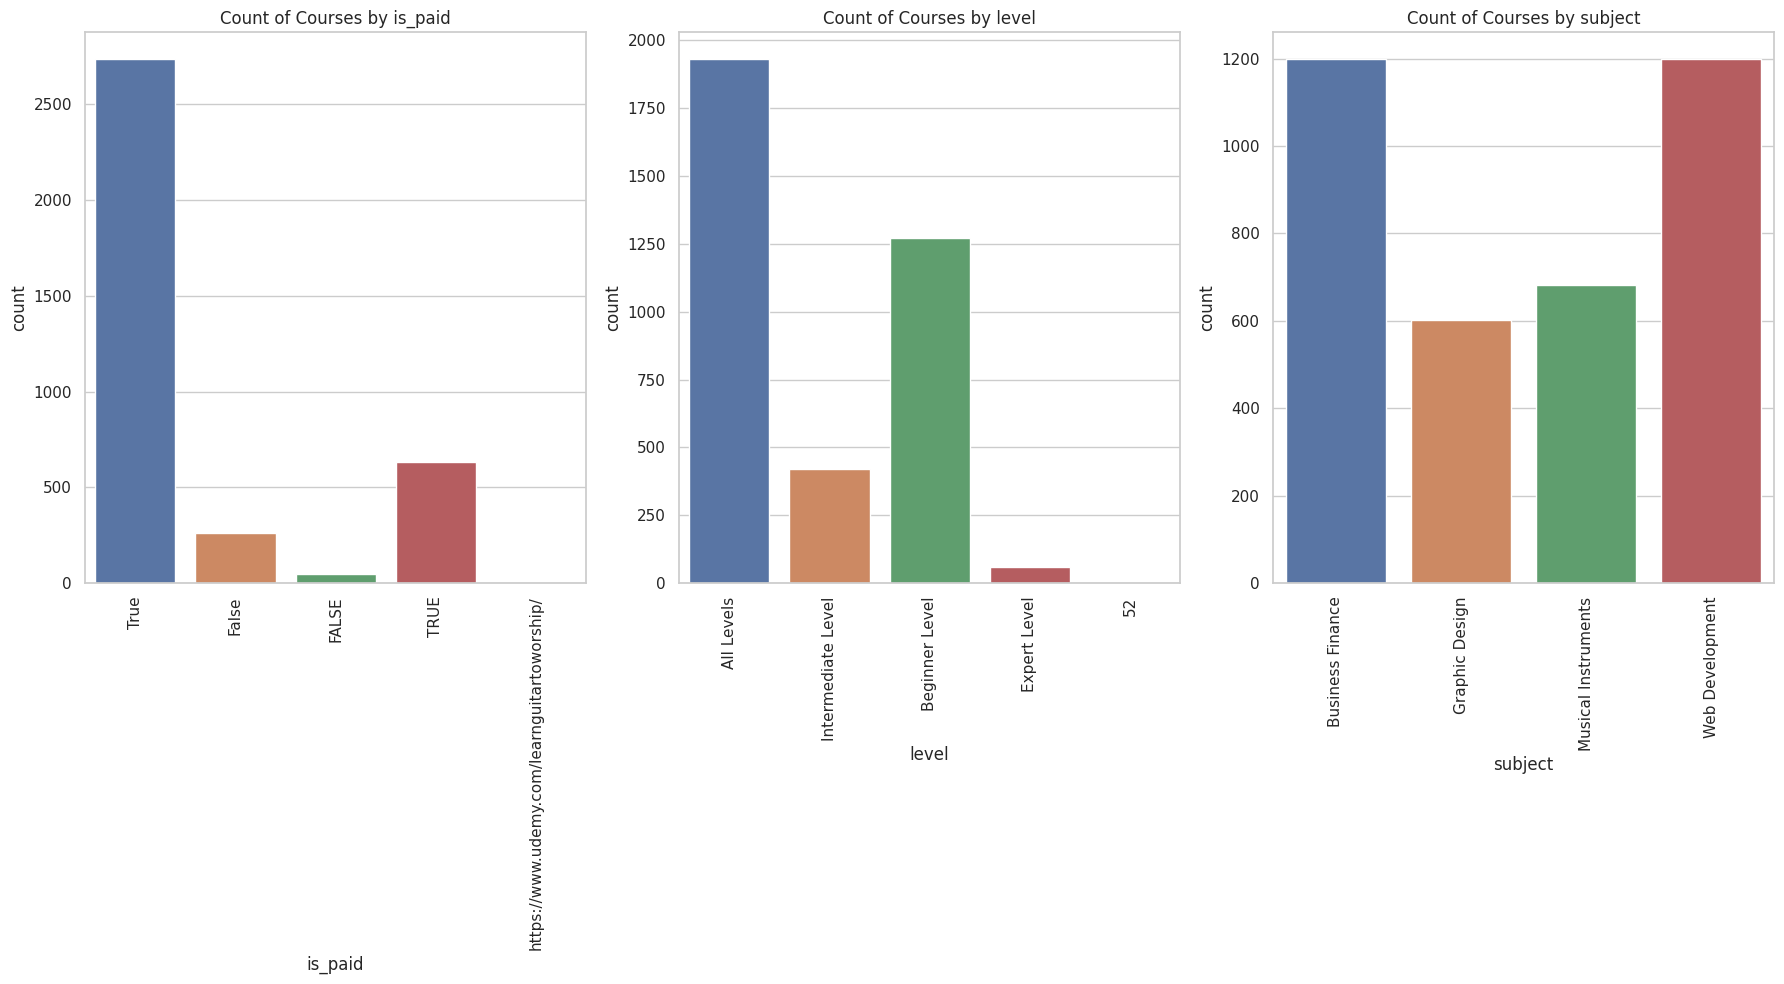

In [11]:
# Visualization 2: Categorical Feature Counts
categorical_cols = ['is_paid', 'level', 'subject']
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Count of Courses by {col}')
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

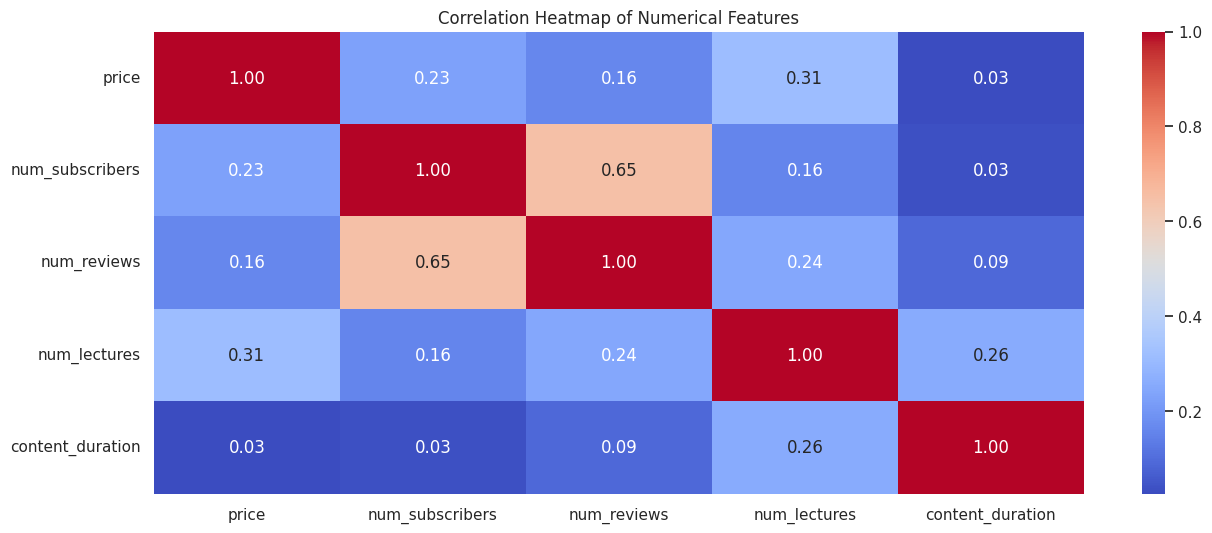

In [12]:
# Step 1: Convert 'price' to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df['content_duration'] = df['content_duration'].astype(str).str.replace(' hours', '', regex=False)
df['content_duration'] = pd.to_numeric(df['content_duration'], errors='coerce')

# Step 3: Define numerical columns again (now they are clean)
numerical_cols = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']



corr = df[numerical_cols].corr()
plt.figure(figsize=(15, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


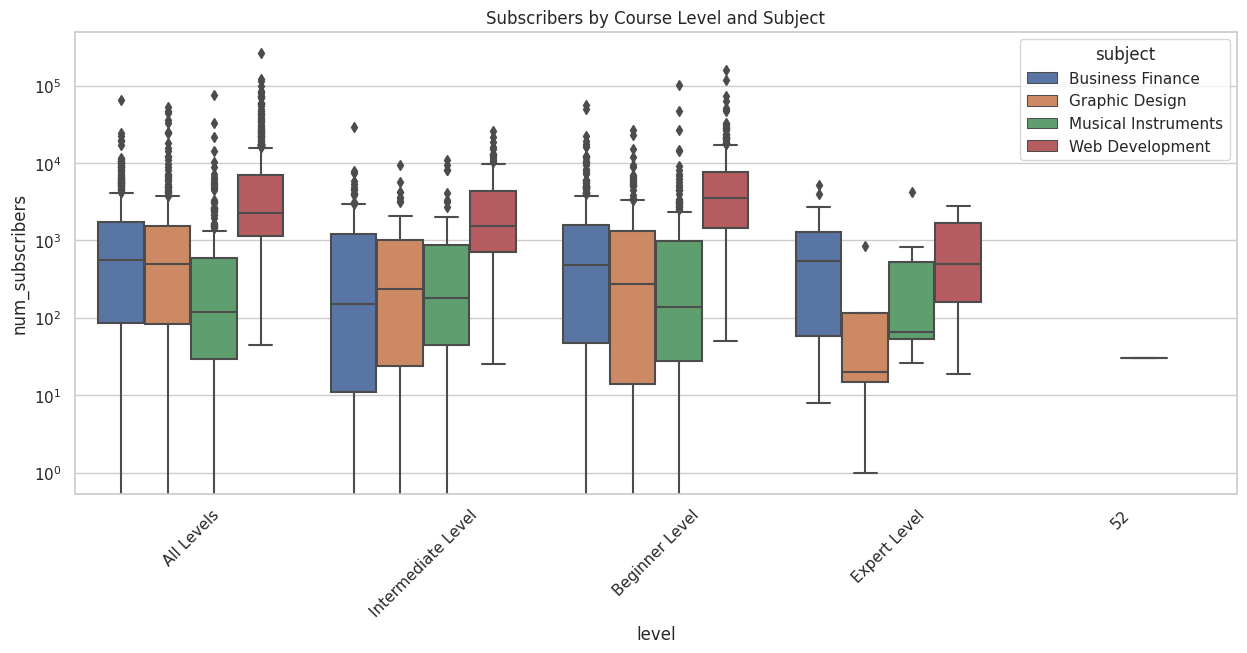

In [13]:
# Visualization 4: Subscribers by Level and Subject
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='level', y='num_subscribers', hue='subject')
plt.title('Subscribers by Course Level and Subject')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()


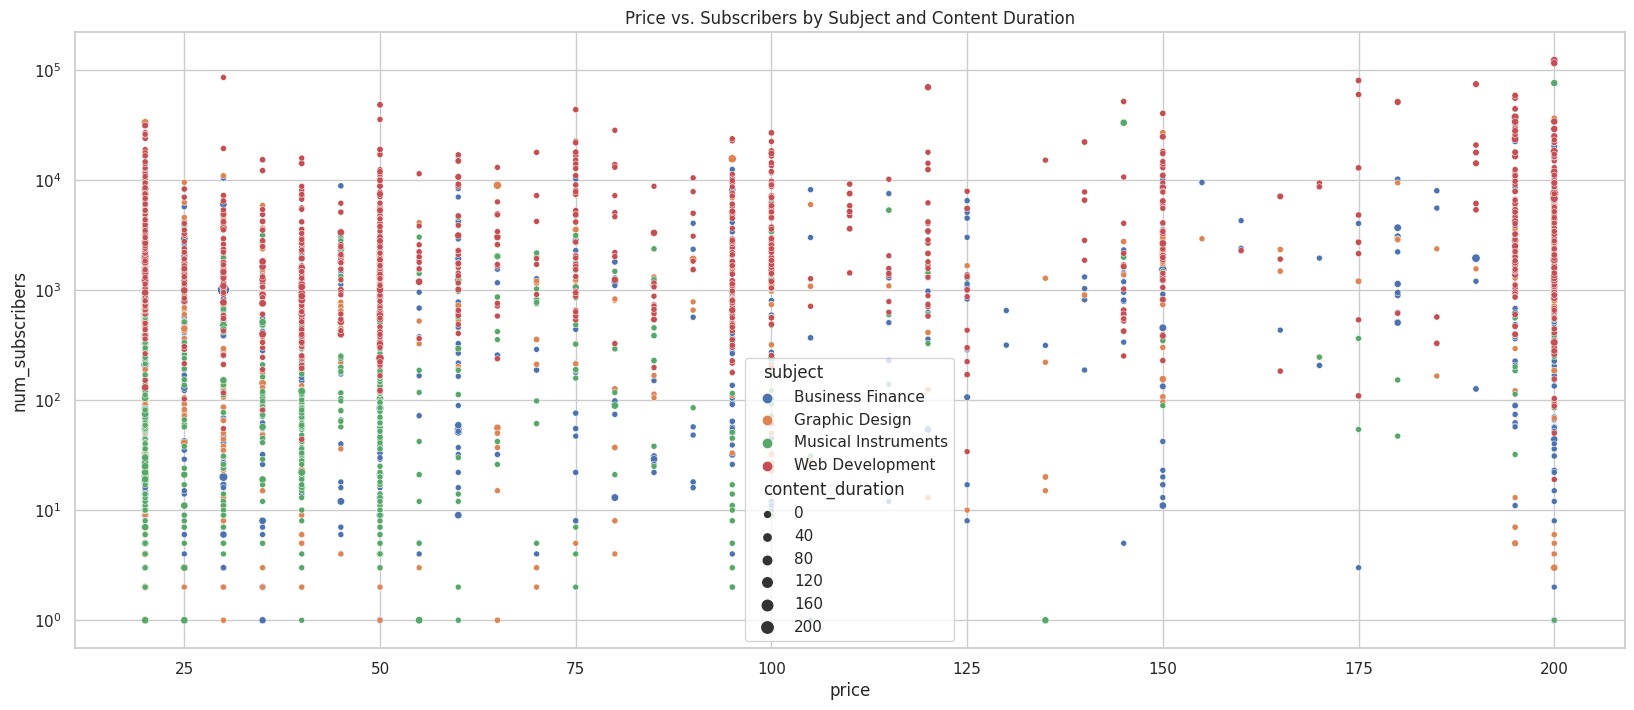

In [14]:
# Visualization 5: Price vs. Subscribers Scatter Plot
plt.figure(figsize=(20, 8))
sns.scatterplot(data=df, x='price', y='num_subscribers', hue='subject', size='content_duration')
plt.title('Price vs. Subscribers by Subject and Content Duration')
plt.yscale('log')
plt.show()

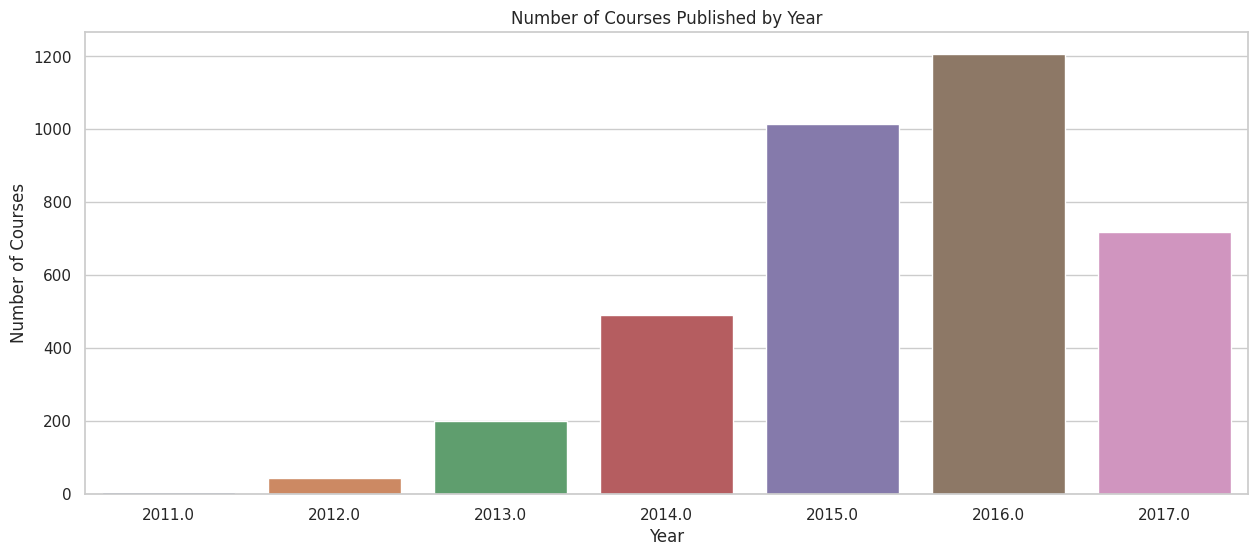

In [15]:
# Visualization 6: Courses Published by Year
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='year')
plt.title('Number of Courses Published by Year')
plt.xlabel('Year')
plt.ylabel('Number of Courses')
plt.show()


In [16]:
# Visualization 7: Interactive Top Courses by Subscribers
top_courses = df.nlargest(10, 'num_subscribers')[['course_title', 'num_subscribers', 'subject']]
fig = px.bar(top_courses, x='num_subscribers', y='course_title', color='subject',
             title='Top 10 Courses by Number of Subscribers')
fig.update_layout(xaxis_title='Number of Subscribers', yaxis_title='Course Title')
fig.show()

In [17]:
# Visualization 8: Content Duration vs. Number of Lectures
fig = px.scatter(df, x='num_lectures', y='content_duration', color='subject',
                 size='num_subscribers', hover_data=['course_title'],
                 title='Content Duration vs. Number of Lectures')
fig.update_layout(xaxis_title='Number of Lectures', yaxis_title='Content Duration (Hours)')
fig.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

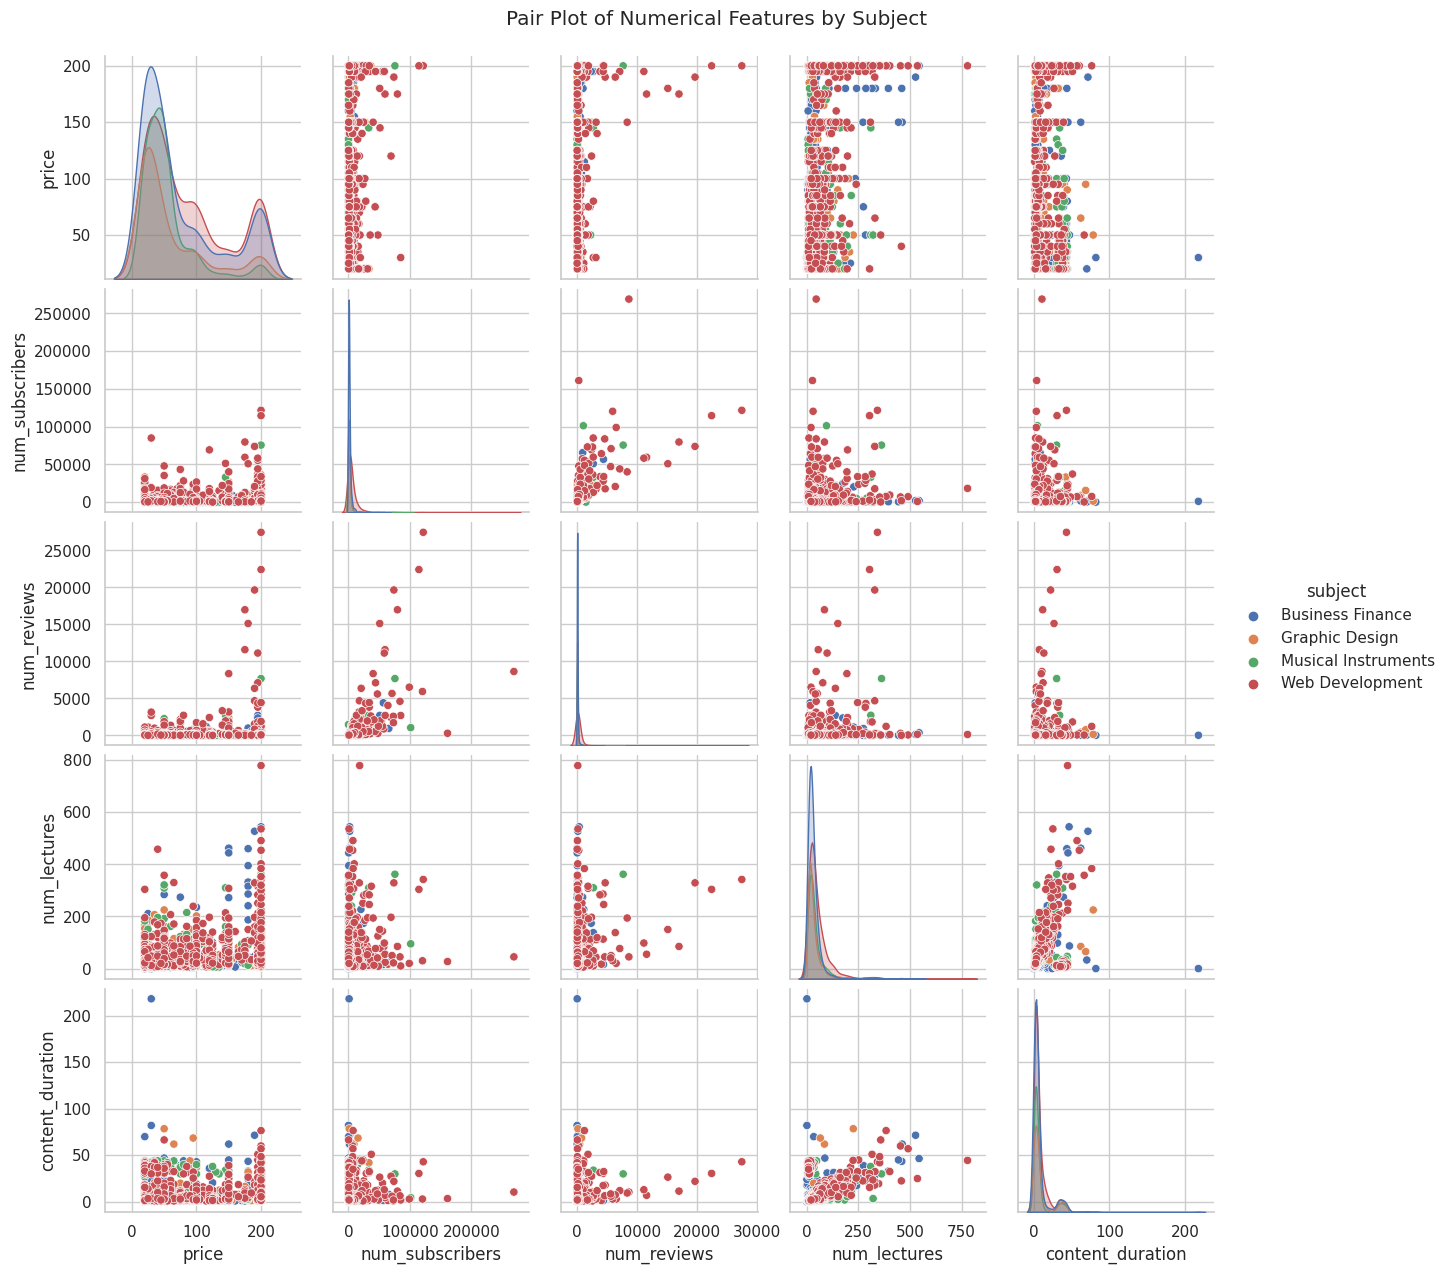

In [18]:
# Visualization 9: Pair Plot for Numerical Features
sns.pairplot(df[numerical_cols + ['subject']], hue='subject')
plt.suptitle('Pair Plot of Numerical Features by Subject', y=1.02)
plt.show()


In [19]:
# Visualization 10: Average Price by Subject and Level
avg_price = df.groupby(['subject', 'level'])['price'].mean().reset_index()
fig = px.bar(avg_price, x='level', y='price', color='subject', barmode='group',
             title='Average Price by Subject and Level')
fig.update_layout(xaxis_title='Level', yaxis_title='Average Price')
fig.show()


In [20]:
# Ensure NaN values in price are handled
df['price'] = df['price'].fillna(0)

# Visualization 11: Subscribers vs. Reviews by Paid Status
fig = px.scatter(df, x='num_reviews', y='num_subscribers', color='is_paid',
                 size='price', hover_data=['course_title'],
                 title='Subscribers vs. Reviews by Paid Status')
fig.update_layout(xaxis_title='Number of Reviews', yaxis_title='Number of Subscribers')
fig.show()

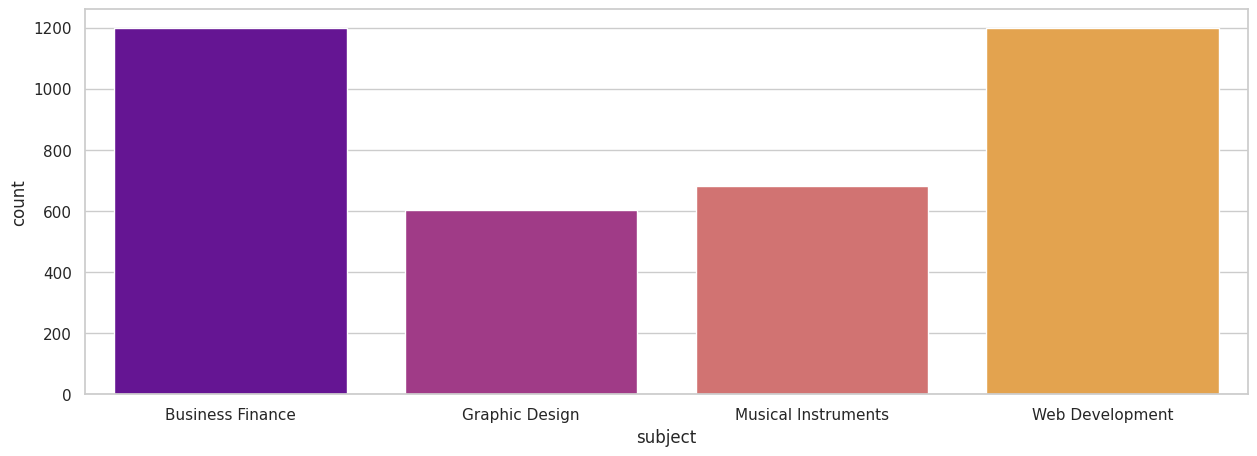

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(x='subject',data=df,palette='plasma')
plt.show()

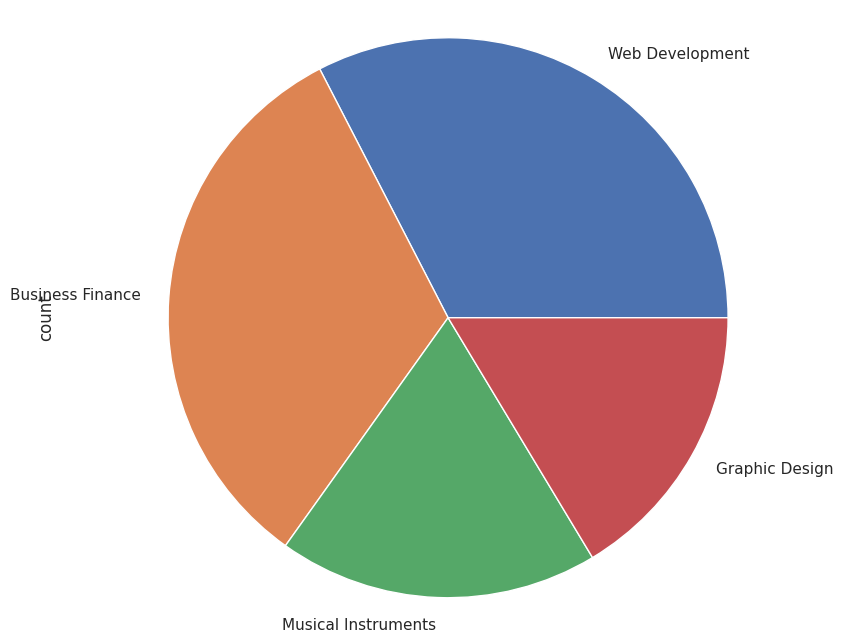

In [22]:
plt.figure(figsize=(10,8))
df['subject'].value_counts().plot(kind='pie')
plt.axis("equal")
plt.show()

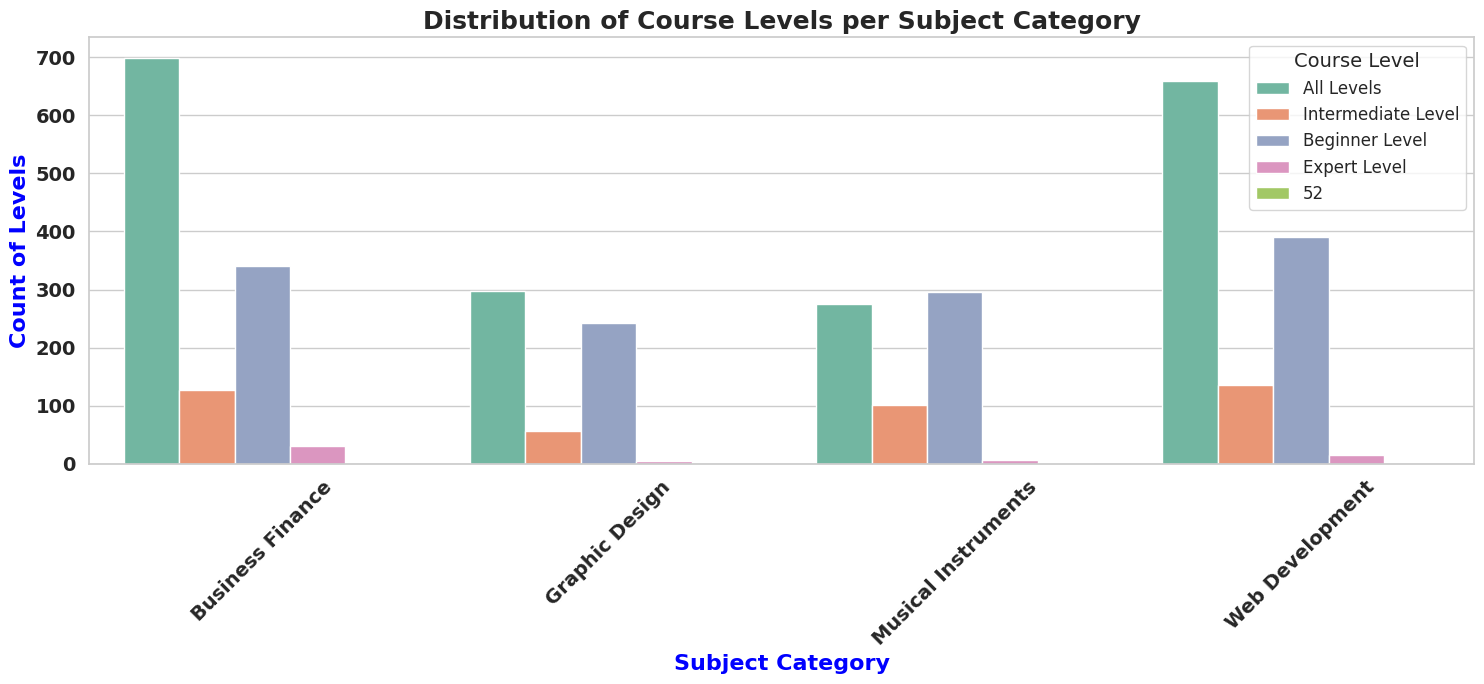

In [23]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='subject', hue='level', palette='Set2')

plt.xticks(rotation=45, fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.xlabel('Subject Category', fontsize=16, fontweight='bold', color='blue')
plt.ylabel('Count of Levels', fontsize=16, fontweight='bold', color='blue')
plt.title('Distribution of Course Levels per Subject Category', fontsize=18, fontweight='bold')
plt.legend(title='Course Level', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

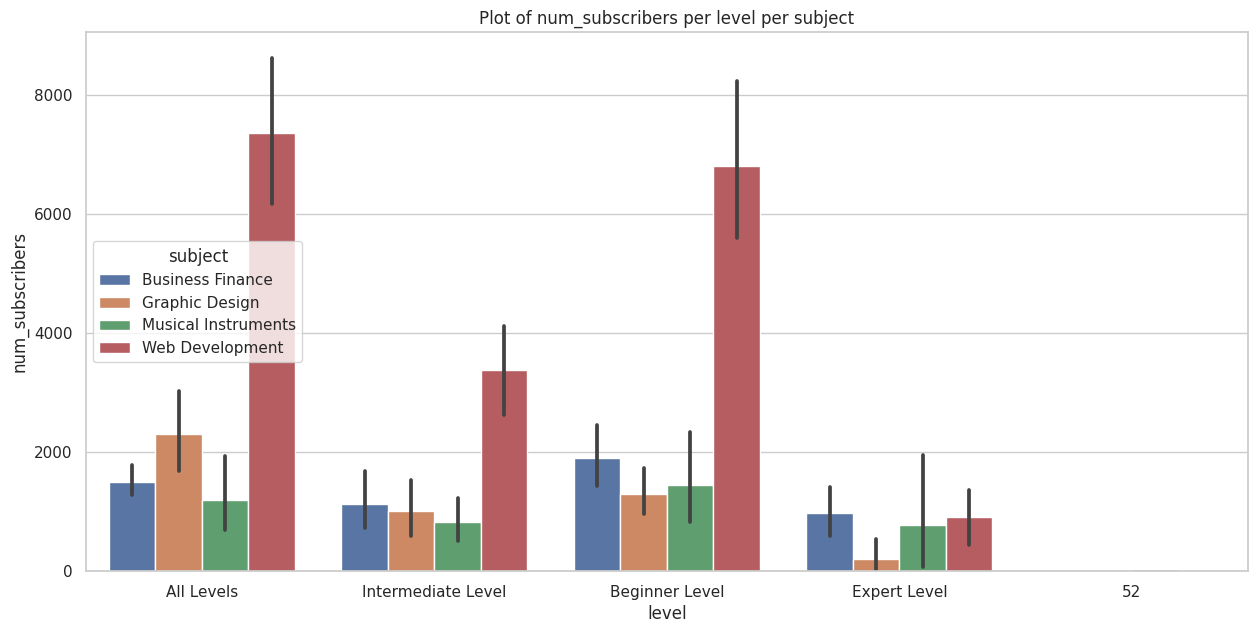

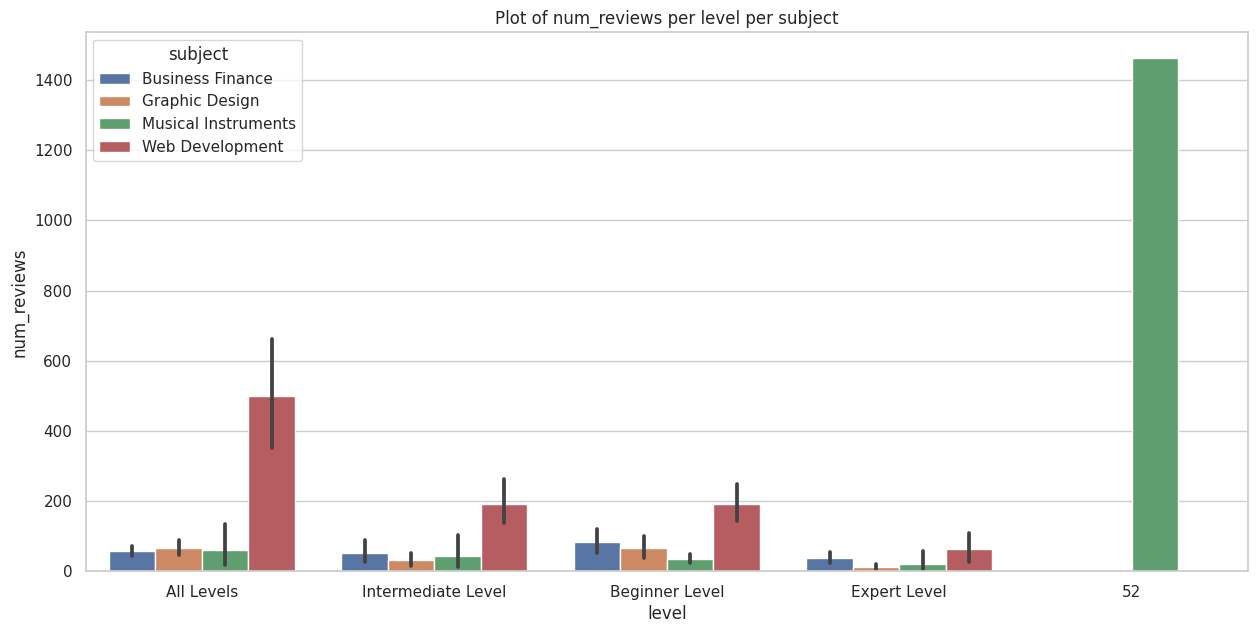

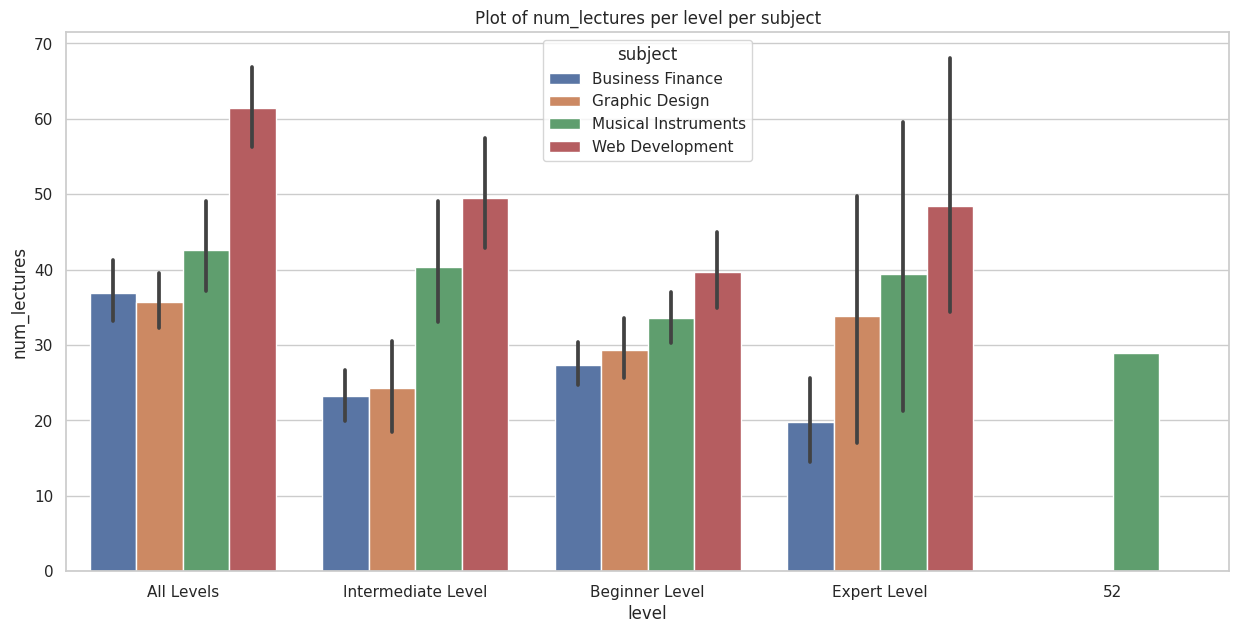

In [24]:
def plotdata(df,feature):
    plt.figure(figsize=(15,7))
    plt.title("Plot of {} per level per subject".format(feature))
    sn.barplot(x = 'level',y = feature,data=df,hue = 'subject')
    plt.show()
    
    
featureslist = ['num_subscribers', 'num_reviews', 'num_lectures']
for feature in featureslist:
    plotdata(df,feature)

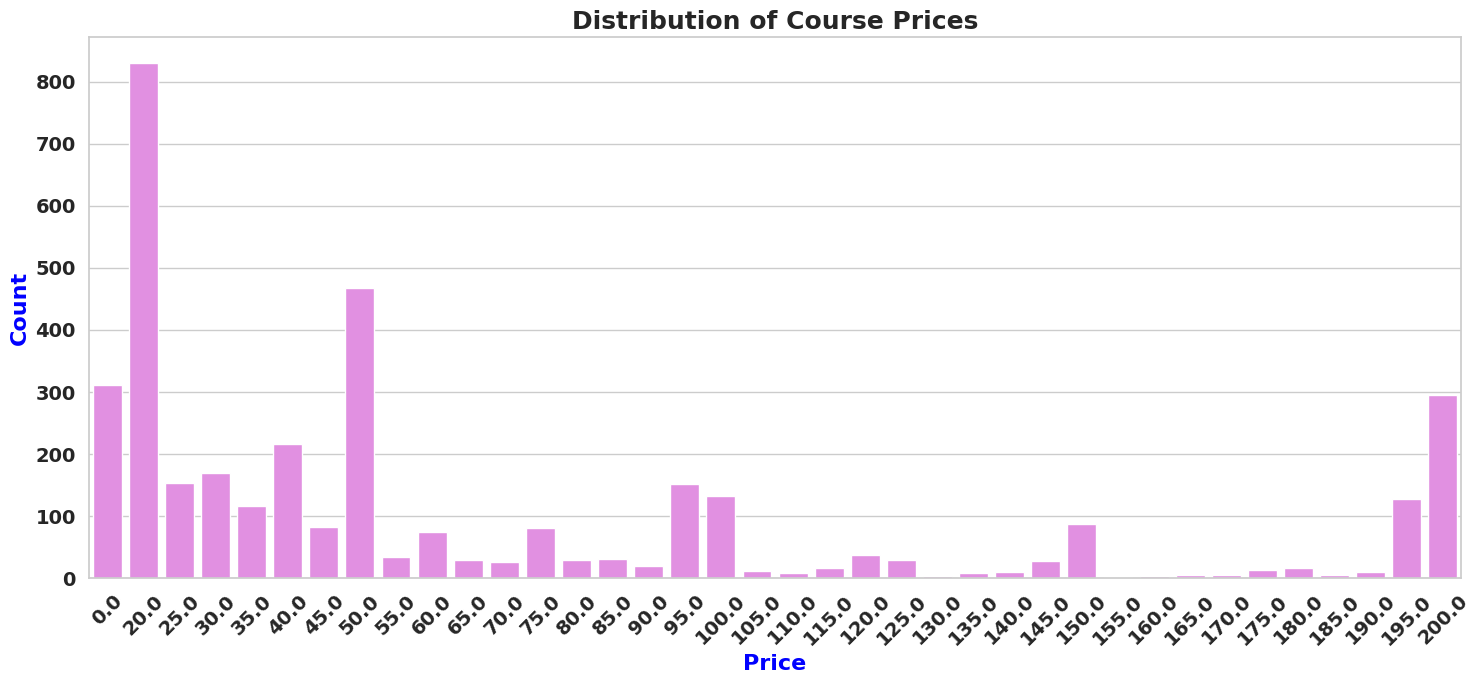

In [25]:
price_counts = df['price'].value_counts().reset_index()
price_counts.columns = ['price', 'count']

# Plot using seaborn
plt.figure(figsize=(15, 7))
sns.barplot(data=price_counts, x='price', y='count', color='violet')

plt.xticks(rotation=45, fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.xlabel('Price', fontsize=16, fontweight='bold', color='blue')
plt.ylabel('Count', fontsize=16, fontweight='bold', color='blue')
plt.title('Distribution of Course Prices', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

In [26]:
df['profit'] = df['price'] * df['num_subscribers']
df[df['profit']==df['profit'].max()].style.background_gradient(cmap = 'Set1')

In [27]:
df[df['profit']==df['profit'].min()].style.background_gradient(cmap = 'gnuplot')

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less



In [28]:

df[df['profit']>=df['profit'].mean()].style.background_gradient(cmap = 'hsv')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

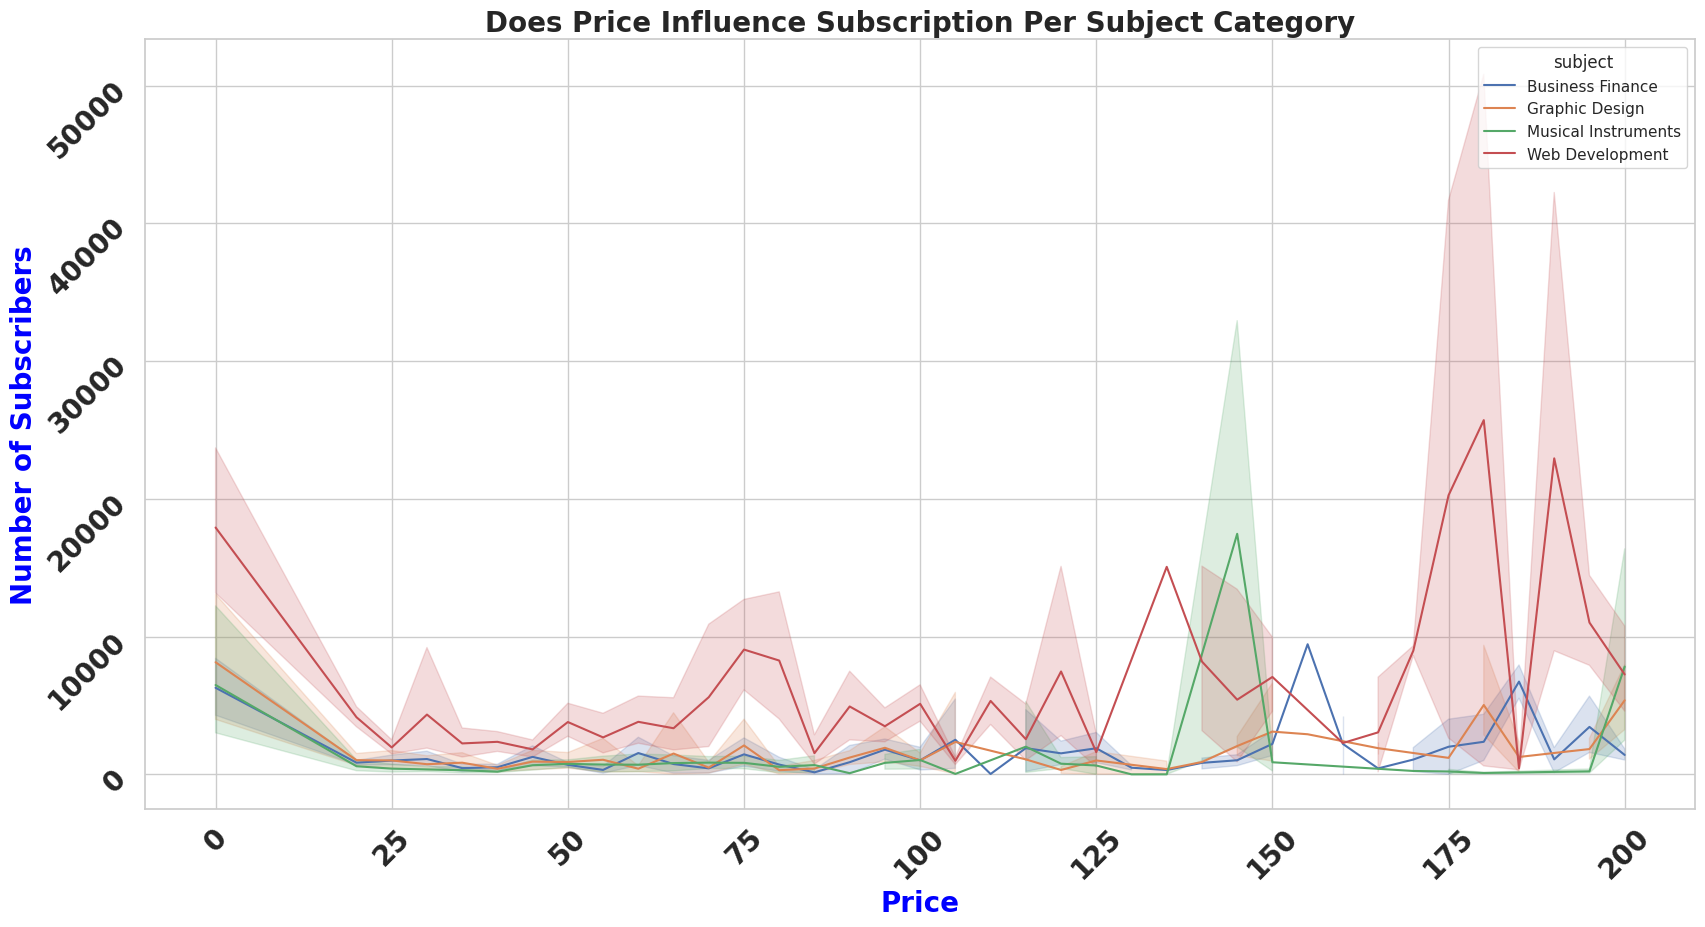

In [29]:
plt.figure(figsize=(20,10))
plt.title("Does Price Influence Subscription Per Subject Category",
         fontsize = 20,fontweight = 'bold')

sn.lineplot(data=df,x='price',y='num_subscribers',hue='subject')

plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Price',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Number of Subscribers',fontsize = 20,fontweight = 'bold',
           color = 'blue')

plt.show()


In [30]:
# Convert published_timestamp to datetime, handling invalid entries
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'], errors='coerce')

# Extract Year, Month, Day, and Month_name directly from published_timestamp
df['Year'] = df['published_timestamp'].dt.year
df['Month'] = df['published_timestamp'].dt.month
df['Day'] = df['published_timestamp'].dt.day
df['Month_name'] = df['published_timestamp'].dt.month_name()

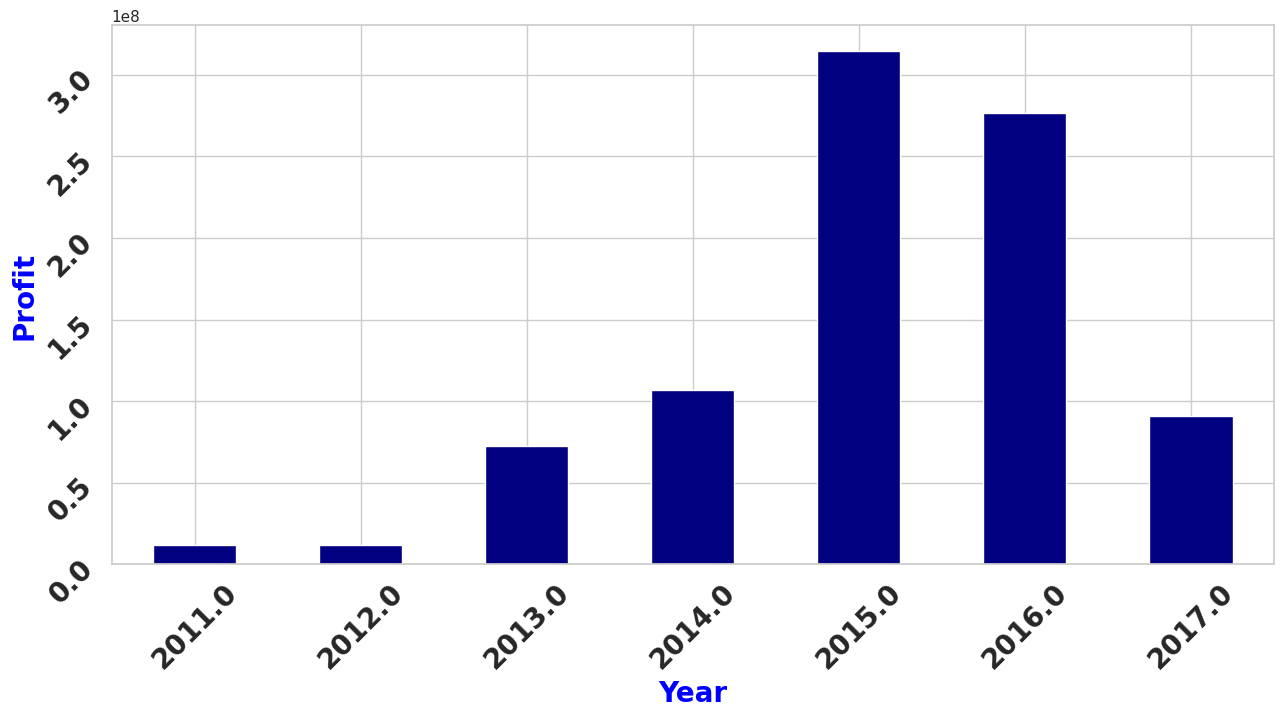

In [31]:
plt.figure(figsize=(15,7))
df.groupby(['Year'])['profit'].sum().plot(kind = 'bar',color="navy")
plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',color = 'blue')
plt.ylabel('Profit',fontsize = 20,fontweight = 'bold',color = 'blue')
plt.show()

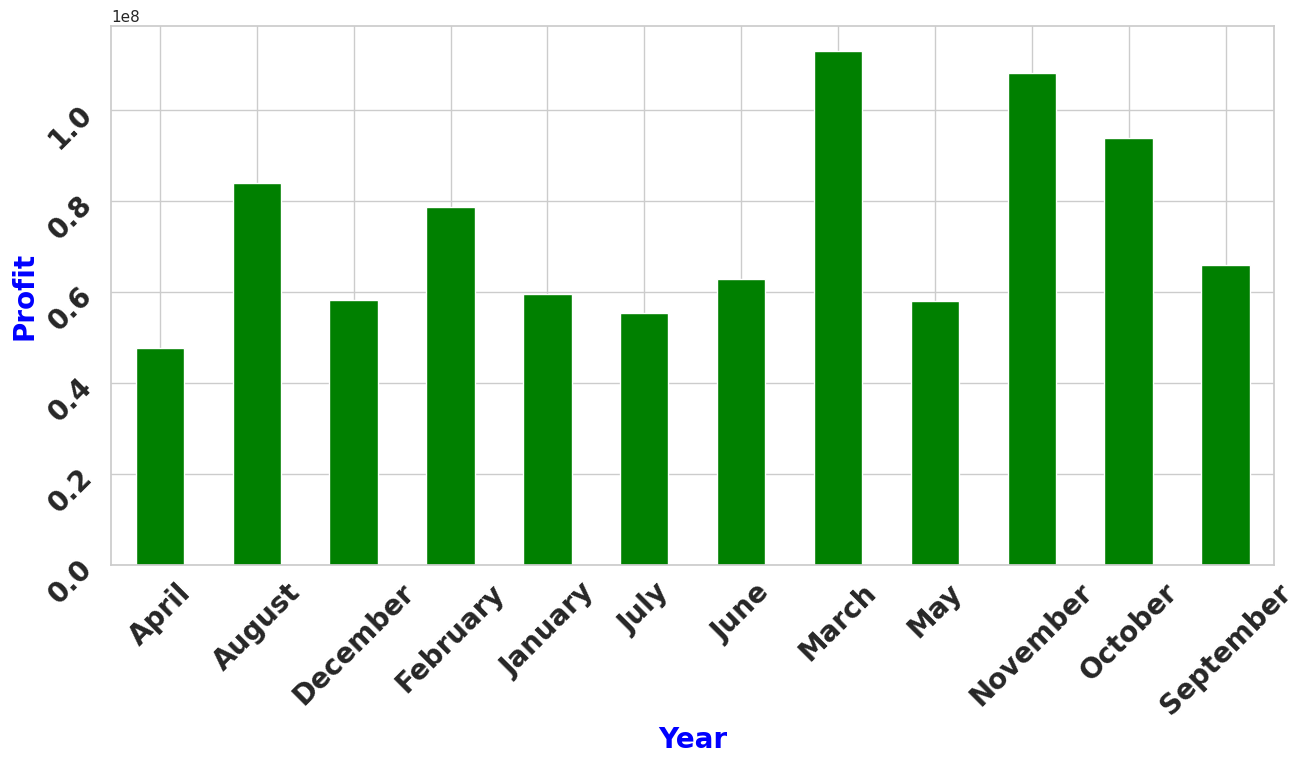

In [32]:

plt.figure(figsize=(15,7))
df.groupby(['Month_name'])['profit'].sum().plot(kind = 'bar',color="green")
plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Profit',fontsize = 20,fontweight = 'bold',
           color = 'blue')

plt.show()

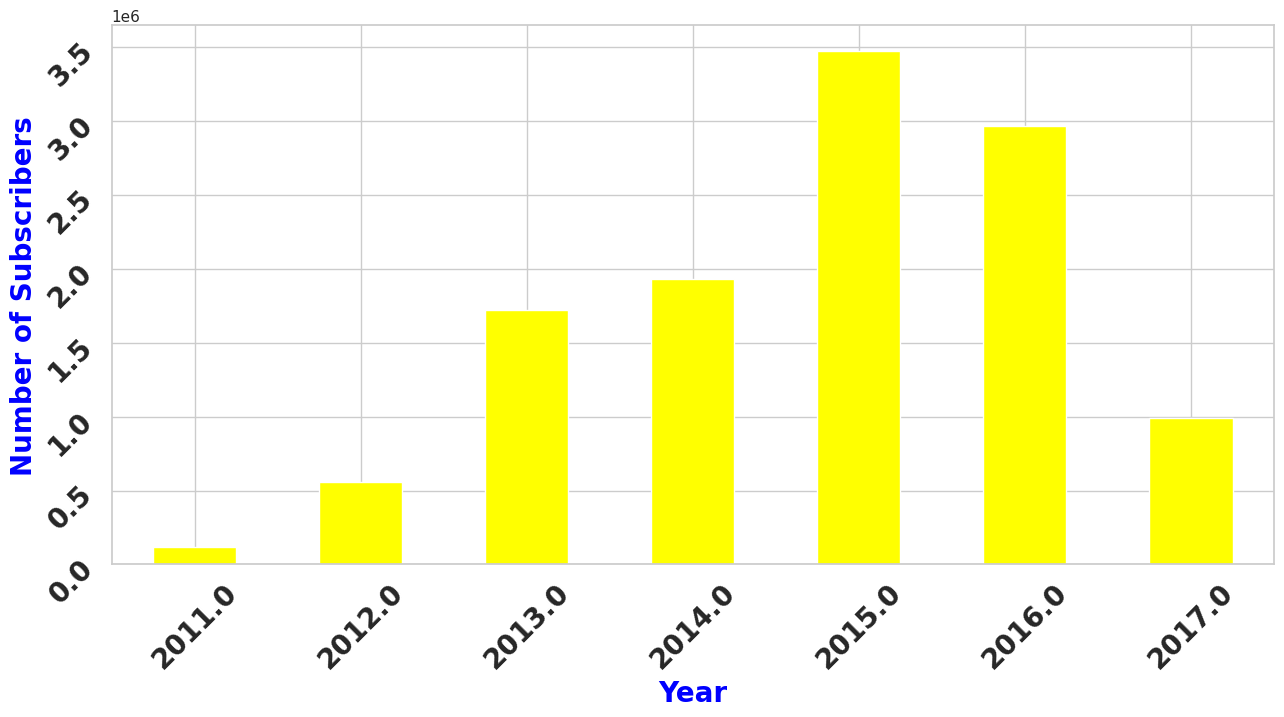

In [33]:
plt.figure(figsize=(15,7))
df.groupby(['Year'])['num_subscribers'].sum().plot(kind = 'bar',color = 'yellow')

plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Number of Subscribers',fontsize = 20,fontweight = 'bold',
           color = 'blue')

plt.show()

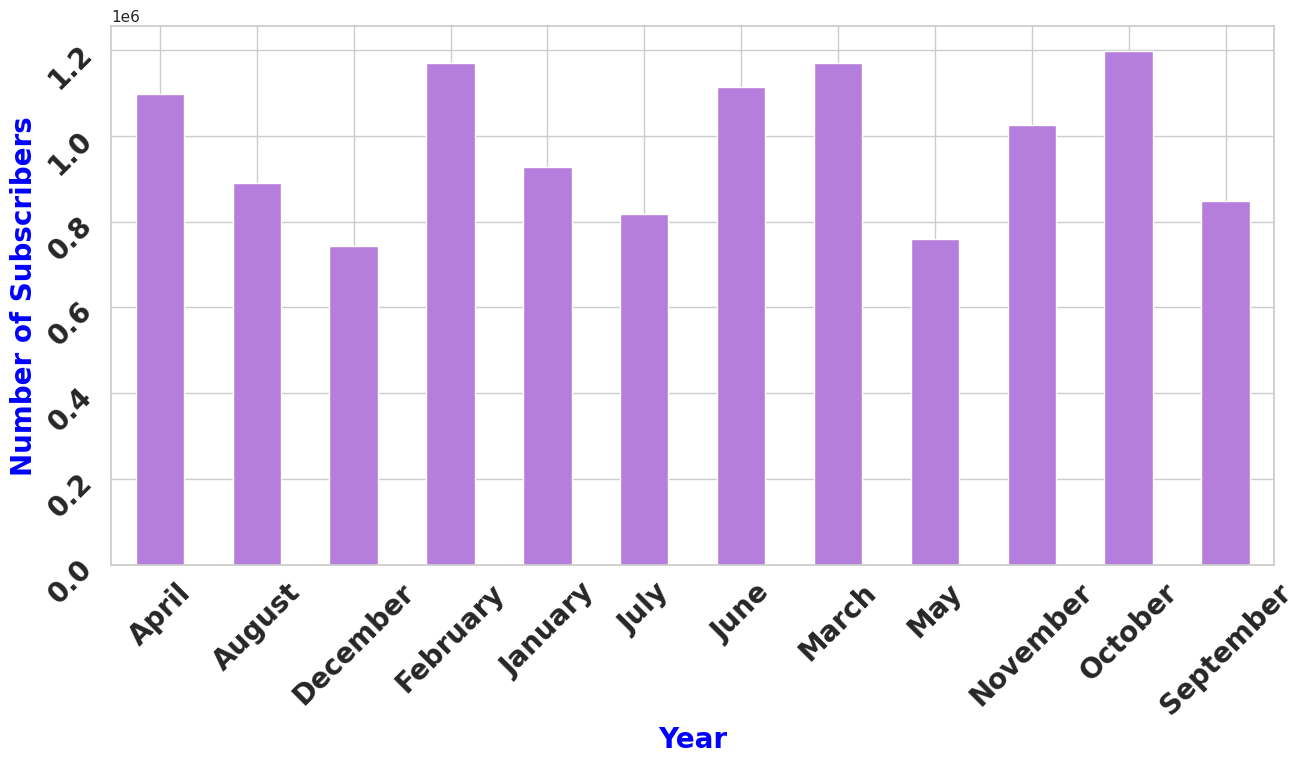

In [34]:
plt.figure(figsize=(15,7))
df.groupby(['Month_name'])['num_subscribers'].sum().plot(kind = 'bar',
                                                         color = '#b57edc')

plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Number of Subscribers',fontsize = 20,fontweight = 'bold',
           color = 'blue')

plt.show()

In [35]:
!pip install neattext

In [36]:
import neattext.functions as nfx
from collections import Counter

df['Clean_title'] = df['course_title'].apply(nfx.remove_shortwords)
df['Clean_title'] = df['Clean_title'].apply(nfx.remove_special_characters)

all_title_list = df['Clean_title'].to_list()
alltokens = [token for line in all_title_list for token in line.split()]
alltokens[: 10]

['Ultimate',
 'Investment',
 'Banking',
 'Course',
 'Complete',
 'Course',
 'Certification',
 'Grow',
 'Your',
 'Practice']

In [37]:
freq_words = Counter(alltokens).most_common(10)
freq_words = dict(freq_words)
freq_words

{'Learn': 498,
 'Trading': 281,
 'with': 278,
 'Course': 235,
 'Beginners': 235,
 'Guitar': 213,
 'Design': 189,
 'Complete': 181,
 'Piano': 179,
 'Photoshop': 169}

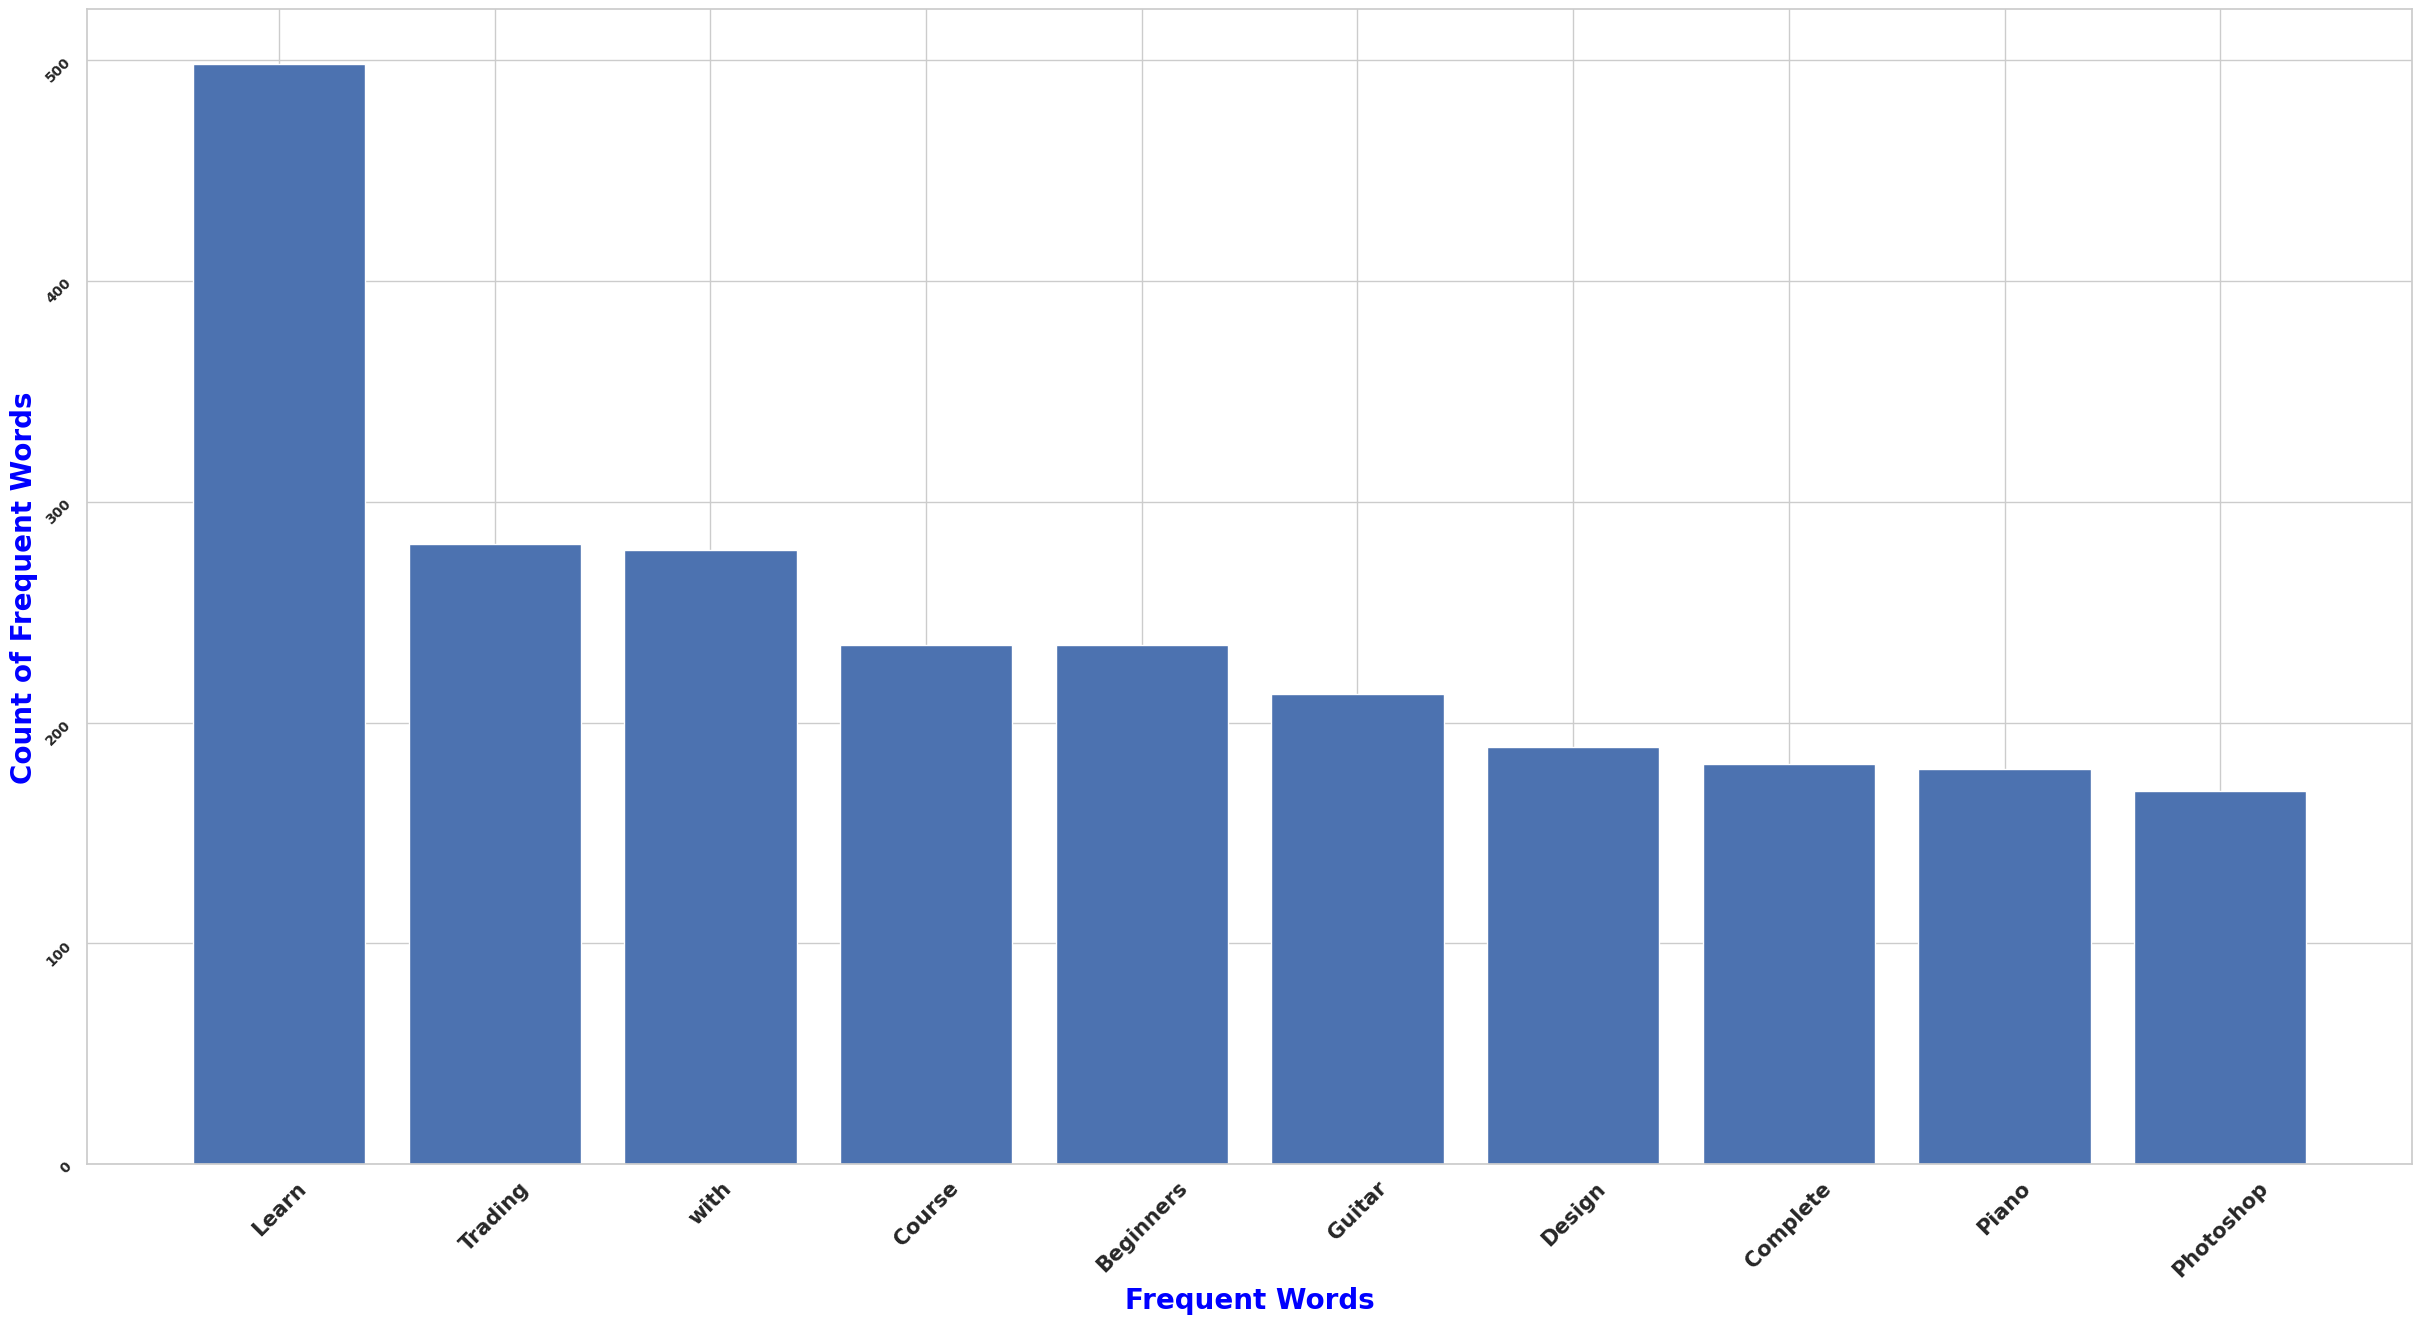

In [38]:
plt.figure(figsize=(30,15))
plt.bar(*zip(*freq_words.items()))
plt.xticks(rotation = 45)

plt.xticks(fontsize = 15,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 10,fontweight = 'bold',rotation = 45)
plt.xlabel('Frequent Words',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Count of Frequent Words',fontsize = 20,fontweight = 'bold',
           color = 'blue')

plt.show()